Statistics is the science of learning from data. 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [5]:
fatal_injuries_wageAndSalary = 4613
fata_injuries_self_employed = 1044

total_wageAndSalary = 136670000
total_self_employed = 10544000

#express fatal injuries per 100k workers
print((fatal_injuries_wageAndSalary / total_wageAndSalary ) * 100000 )  #3.4 per 100k workers
print((fata_injuries_self_employed / total_self_employed ) * 100000 ) #9.9 per 100k workers

#the risk is not greater at the wage and salary workers, but self employed workers 
#are 3x more likely to have fatal injury at work

3.375283529670008
9.901365705614568


#### 1.1 Displaying Distributions

In [6]:
data = {
    'Company': ['Garmin', 'TomTom', 'Magellan', 'Mio', 'Other'],
    'Percent': [47, 19, 17, 7, 10]
}
df = pd.DataFrame(data)
df

,Company,Percent
0,Garmin,47
1,TomTom,19
2,Magellan,17
3,Mio,7
4,Other,10


<function matplotlib.pyplot.show(close=None, block=None)>

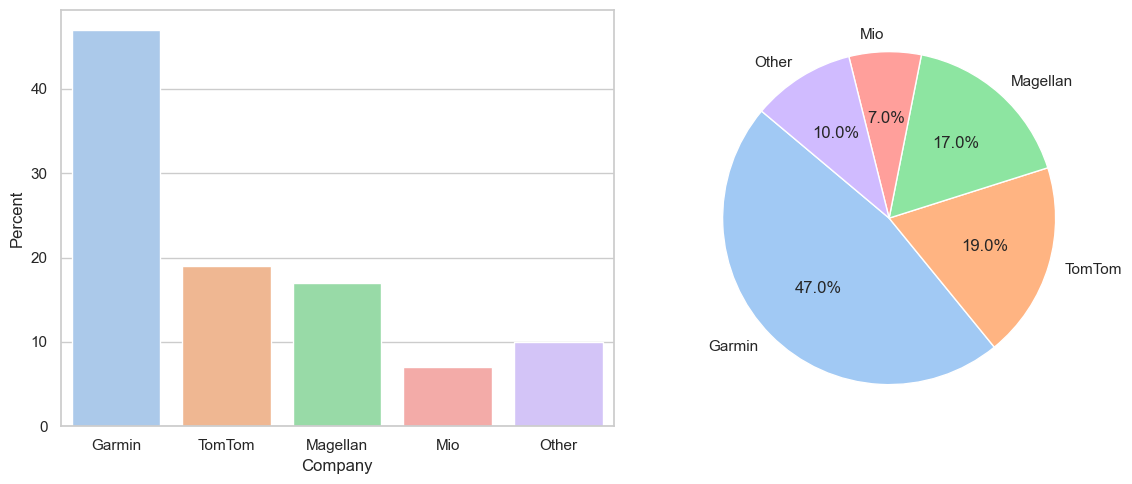

In [11]:
sns.set(style = 'whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='Company', y='Percent', data=df, ax=axs[0], palette='pastel')
axs[1].pie(df['Percent'], labels=df['Company'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.tight_layout()
plt.show

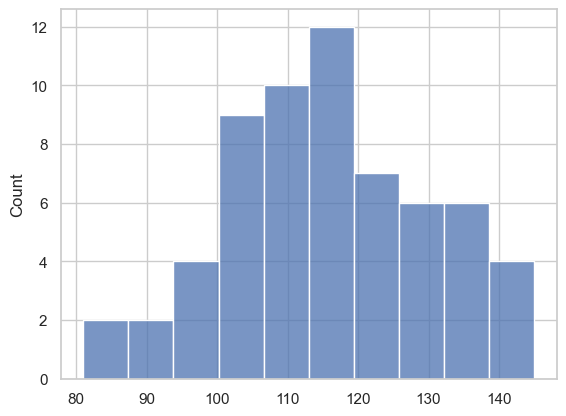

In [23]:
random_students = [145, 139, 126, 122, 125, 130, 96, 110, 118, 118,
                  101, 142, 134, 124, 112, 109, 134, 109, 134, 113, 81, 113, 
                  123, 94, 100, 136, 109, 131, 117, 110, 127, 124, 
                  106, 124, 115, 133, 116, 102, 127, 117, 109, 137,
                  117, 90, 103, 114, 139, 101, 122, 105, 97, 89, 
                  102, 108, 110, 128, 114, 112, 114, 102, 82, 101]

sns.histplot(random_students, bins=10)
plt.show()

#### 1.2 Describing Distributions with Numbers
Brief description of a distribution should include its shape, center and spread

In [101]:
data = {    'Data': [23, 42, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 
                     60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42, 100, -50]  }
df = pd.DataFrame(data)

##### Center
Two common measures are mean and median, two different ideas of center, and they behave differently. 
- mean is the average value, it is sensitive to outliers
- median is middle value, formal measure, midpoint, half the data is smaller than median and the other half larger than median

In [77]:
print(  df['Data'].mean()     )
print(  df['Data'].median()   )

37.88461538461539
41.0


##### Spread
- spread aka variability 

In [78]:
df['Data'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Data,26.0,37.884615,27.123904,-50.0,23.25,41.0,46.75,100.0


<AxesSubplot:xlabel='Data'>

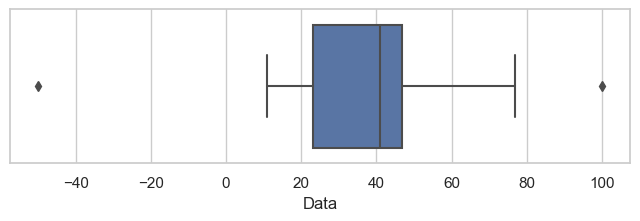

In [79]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Data'])

##### 1.5 x IQR for outliers
The distance between Q1 and Q2 is called interquartile range

In [80]:
Q1 = df['Data'].quantile(0.25)
Q3 = df['Data'].quantile(0.75)

IQR = Q3 - Q1

outliers = 1.5 * IQR   

outliers1 = Q1 - outliers
outliers2 = Q3 + outliers

print(outliers1, outliers2)
#values below 12, and above 82 are considered outliers. 

-12.0 82.0


##### Standard Deviation
Looks how far the data point is from their mean. It is affected by outliers

In [82]:
st_dev = df['Data'].std()
st_dev
#average amount by which a single data point deviate from the mean is 27, thus there is considerate variability
#it reflects how dispersed the dats


27.12390373537987

#### 1.3 Density Curves and Normal Distribution
Changing the units of the data values is called standarizing. A standarized value is often called z-score. Z-score tells us how many standard deviations the original observation falls away from the mean and in which direction. 

In [102]:
df['mean'] = df['Data'].mean()
df['st_dev'] = df['Data'].std()

df['z_score'] = zscore(df['Data'])
df = df.sort_values(by='z_score')
df

,Data,mean,st_dev,z_score
25,-50,37.884615,27.123904,-3.304284
15,11,37.884615,27.123904,-1.010807
21,14,37.884615,27.123904,-0.898013
16,23,37.884615,27.123904,-0.559631
8,23,37.884615,27.123904,-0.559631
7,23,37.884615,27.123904,-0.559631
0,23,37.884615,27.123904,-0.559631
5,24,37.884615,27.123904,-0.522033
11,27,37.884615,27.123904,-0.409240
2,29,37.884615,27.123904,-0.334044


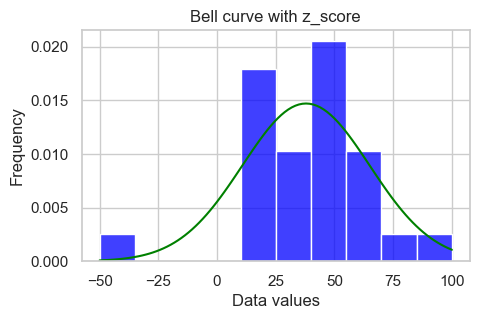

In [122]:
from scipy.stats import norm, zscore

mean = df['Data'].mean()
std = df['Data'].std()

plt.figure(figsize=(5, 3))
sns.histplot(df['Data'], stat='density', color='blue', bins=10)
x = np.linspace(df['Data'].min(), df['Data'].max(), 100)
plt.plot(x, norm.pdf(x, mean, std), color='green')  #normal distribution curve

plt.title('Bell curve with z_score')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()